In [29]:
%%time

from tqdm import tqdm
import numpy as np
from pickle import load

def read_matrix_txt():
    # 3:30 -- float64
    # 3:35 -- float32
    f_desc = open("../datasets/model.txt")
    rows, cols = map(int, f_desc.readline().split())
    ans = np.zeros((rows, cols), dtype='float32')
    words = []
    for i in tqdm(range(rows)):
        tokens = f_desc.readline().split()
        words.append(tokens[0])
        for j in range(cols):
            ans[i][j] = float(tokens[j + 1])
    return ans, words

def read_matrix_pickle():
    # 0:14 -- float64
    # 0:02 -- float32
    with open("../datasets/model.pickle", "rb") as f:
        mat = load(f)
        words = load(f)
    return mat, words


def make_dump():
    mat, words = read_matrix_txt()
    with open("../datasets/model.pickle", "wb") as f:
        dump(mat, f)
        dump(words, f)
    del mat, words

100%|██████████| 297790/297790 [03:30<00:00, 1414.38it/s]


CPU times: user 3min 23s, sys: 6.52 s, total: 3min 29s
Wall time: 3min 35s


In [30]:
%%time

mat, words = read_matrix_pickle()
mat.dtype

CPU times: user 263 ms, sys: 785 ms, total: 1.05 s
Wall time: 1.53 s


In [32]:
mat.dtype

dtype('float32')

In [34]:
from sklearn.decomposition import PCA

In [35]:
%%time

pca = PCA(n_components=5)
pca.fit(mat)

CPU times: user 21.8 s, sys: 9.81 s, total: 31.6 s
Wall time: 10.1 s


In [37]:
%%time

pca = PCA(n_components=50)
pca.fit(mat)

CPU times: user 39.3 s, sys: 19.6 s, total: 58.8 s
Wall time: 24.7 s


In [44]:
%%time

pca = PCA(n_components=250)
pca.fit(mat)

CPU times: user 1min 19s, sys: 19.1 s, total: 1min 38s
Wall time: 36.6 s


In [52]:
pca.explained_variance_ratio_[:10], pca.explained_variance_ratio_[-10:]

(array([0.04582565, 0.02813517, 0.02501303, 0.0230872 , 0.01675057,
        0.01635841, 0.01440965, 0.01339907, 0.01223925, 0.01137531]),
 array([0.0014468 , 0.00143744, 0.0014359 , 0.00143078, 0.00142674,
        0.00141502, 0.00140548, 0.00139961, 0.00139606, 0.00139128]))

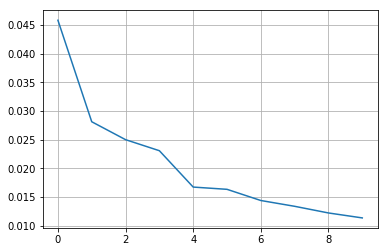

In [51]:
plt.plot(pca.explained_variance_ratio_[:10])
plt.grid(True)

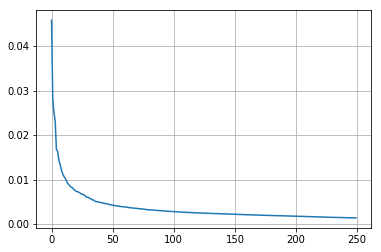

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(pca.explained_variance_ratio_)
plt.grid(True)

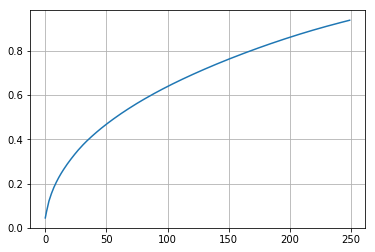

In [48]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)

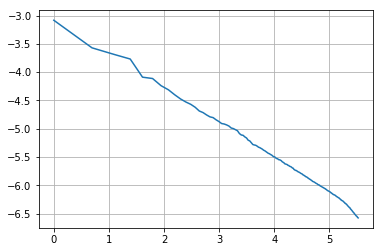

In [50]:
x = np.log(list(range(1, 251)))
y = np.log(pca.explained_variance_ratio_)
plt.plot(x, y)
plt.grid(True)